# Classical Statistical Inference: Part 1b

## Table of Content:

- I. [Basic probability concepts](Basic-statistics_01_Part1a.ipynb/#I)    
    * I.1 [Probability Axioms](Basic-statistics_01_Expanded.ipynb)
    * I.2 [What is a random variable ?](Basic-statistics_01_Part1a.ipynb/#I.2-What-is-a-random-variable-?)
    * I.3 [What is a conditional probability $p(A|B)p(A | B)$ and Bayes theorem ?](Basic-statistics_01_Part1a.ipynb/#I.3-What-is-a-conditional-probability-$p(A-|-B)$-and-Bayes-theorem?)
    * I.4 [What is a probability density function ?](#pdf)
    * I.4b [Bivariate PDF](#bivariate)
    * I.5 [What is a cumulative distribution function ?](#I.5-What-is-a-cumulative-distribution-function-?)
    * I.6 [Working with pdf and CDF](#I.6-Working-with-pdf-and-CDF):
        - I.6.1 [Generate random samples drawn from a specific distribution](#I.6.1-Generate-random-samples-/-Monte-Carlo-methods:)
        - I.6.2 [Fit Parameters of specific distributions](#I.6.2-Fit-for-parameters-of-specific-distributions:)
        - I.6.3 [Calculate statistical quantities associtated to a distribution](#I.6.3-Calculate-statistical-quantities-associated-to-a-distribution)


- [Descriptive statistics](#Intermezo:-Descriptive-statistics)
    * To review the **properties of probability distribution functions** (mean, standard deviation, variance, skewness, ...), go to the notebook [Descriptive_statistics_01.ipynb](Descriptive_statistics_01.ipynb).    
    * To **better understand visually the link between PDF and CDF**, and do an interactive tour of the characteristics and properties of **common distributions** encountered in science, then, run the Notebook [Descriptive_statistics_02.ipynb](Descriptive_statistics_02.ipynb). 

- X. [References and supplementary material](#X)

In [1]:
# Modules to be used in this notebook
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

See [Basic-statistics_01_Part1a.ipynb](Basic-statistics_01_Part1a.ipynb) for the motivation and definitions. 

### I.4 What is a probability density function ? <a class="anchor" id="pdf"></a>

We will generally be dealing with probability *densities*, that is, $p(x)\,\rm{d}x$ is the probability of a value falling between $x$ and $x \,+\, {\rm{d}}x$.

Remember the histogram, counting your measurements (cf exercise on [coin toss](#Exercise:-Coin-toss)  above), setting the density to `True`. You have $\sum p(x) \delta x = 1$ (where $\delta x$ = bin width). This is a probability density function (effectively a probability mass function because you work with discrete variables).      

Probability densities are normalized such that the union of all possible events has a probability of unity; mathematically that criterion looks like this:

$$
\int p(x)\,{\rm{d}}x = 1
$$

Among other things, consider the **units** implied by this expression: because probability is dimensionless, the *units of $p(x)$* must be the *inverse of the units of $x$*.
This can be very useful to keep in mind as you manipulate probabilistic expressions!

If the concept of PDF was not aleady clear to you, check Section I.4 of the [expanded version](Basic-statistics_01_Expanded.ipynb) of this Notebook to look at the more formal definition of the pdf. 

**Examples:**    
You know several pdf, such as the *uniform* and the *normal* (aka gaussian) pdf.  

- A *uniform* pdf is such that:

$$
\begin{array} \\ 
   h(x)    & = \frac{1}{b-a} \,\, {\rm{if}}\,a\,\leq\,x\,\leq\,b \\
   h(x)    & = 0 \,\,\, {\rm{otherwise} }  \\
\end{array}
$$

- The gaussian pdf of mean $\mu$ and standard deviation $\sigma$ is:

$$
h(x ; \mu, \sigma) = \frac{1}{\sqrt{2\pi}\,\sigma} \exp \left( -\frac{1}{2}\frac{(x-\mu)^2}{\sigma^2}\right)
$$

It is important to keep in mind that, as a probability can't be larger than 1, the integral of $h(x)$ over that integration domain has to be 1, otherwise we do not have a properly normalised pdf. This explains the  normalisation $1/\sqrt{2\pi}\,\sigma$ in front of of the gaussian pdf. 

- In cases where random variables are **discrete**, one rather speaks of **probability mass function** (pmf). In this case, $X$ may take a (finite) number of values ${x_1, x_2, ..., x_n}$ and the mass function is simply:
$$
h_X(x) = p(X\,=\,x)
$$

The *Poisson* or *Bernouilli* distribution are examples of pmf. 


#### Relevance of pdf for statistical inference:

Probability density function is at the heart of data mining, and data analysis in general. A key question is indeed to figure out what is the pdf $h_X(x)$ that is behind a set of random variables (directly observed or predicted by a model fed by some data). I.e. we generally try to answer the question "From which pdf $h(x)$ are drawn my $x$ ?". In Bayesian inference, one tries to derive the (posterior) pdf associated to a quantity. Why are we interested by those ? Because they tell us something about the probability of an event/observation to occur or help us to figure out whether a physical model is sensible *given* the observations in hands.  


Following the convention of our [reference book](#book), we use $h(x)$ when we refer to the *true* pdf (or **population** pdf), and $f(x)$ when we refer to its *data* derived estimate (**empirical** pdf). Since $x$ are generally measured with errors, it may be that $f(x)$ does not tend to $h(x)$ even for an infinite number of measurements (we end up with a "blurred" or "broadened" version of the pdf). Because $h(x)$ gives the probability that $x$ falls in an (infinitely) small interval $x, x+{\rm{d}}x$, the pdf is also sometimes written $p(x)$ (cf Chapter 3 of our [reference book](#book)). 

As we said, $f(x)$ is a *model* of the *true* distribution $h(x)$. We observe data points that are *samples* of the true distribution $h(x)$. In general, we do not know $h(x)$ and we have to guess its functional form. This function form can either be "parametric" (e.g. a gaussian) or "non parametric" (e.g. a sum of small gaussians that mimic a more complex pdf). 

**Examples of pdf in scientific papers:**

- Marginalised pdf on H0 in Fig. 4 Bonvin et al. 2017 http://arxiv.org/abs/1607.01790 
![ima](../Figures/HOLICOW_pdf.png)
- 2D PDF on pairs of gravitational lensing parameters in Fig. 7 of Hartley et al. 2019 http://arxiv.org/abs/1901.05791v1 
- Probability Density Function for frequency of Jovian-mass planets around intermediate-mass stars interiorto∼3 AU: Figure 13 of Bowler et al. 2009 https://arxiv.org/abs/0912.0518 

#### Python implementation

A large number of distribution functions are implemented in `scipy.stats`, such as the binomial distribution, poisson distribution, gaussian distribution, chi2, Cauchy distribution, ... To use them you simply have to:     

**Method 1**

You work in two steps. It allows you to calculate multiple quantities associated to a distribution. 

- 1) **Create an instance of an object "distribution"** with some fixed parameters:    
e.g. 

``` python
# Create a gaussian function with parameters mu=0, sigma=2
g = scipy.stats.norm(0, 2)  

# Poisson distribution for 10 events
pois = scipy.stats.poisson(10)  
```

**Note:** The help of `scipy` distribution generally refers to the `loc` and `scale` keywords associated to the distribution. The `loc` corresponds to the `mean` (i.e. expectation value of order 1 moment) and the `scale` corresponds to the `standard deviation`. 

In [2]:
g = scipy.stats.norm(0, 2)   # Equivalently use: g = scipy.stats.norm(loc=0, scale=2.)

- 2) Calculate **properties associated to (the instance of) this object** using a set of *specific methods*. For the pdf, use the method pdf: 

``` python
# Evaluate the pdf / pmf associated to our objects g / pois at "position" x / k

g_pdf = g.pdf(x) # x is either a numpy array or a specific value

pois_pmf = pois.pmf(k)  # k is an array of integers or a specific value
```

**Method 2**

You can generate a `pdf` associated to a normal distribution with a single command line: 

``` python 
x = np.arange(-10,10,0.1) # Create an array over which you want to evaluate the pdf

y = scipy.stats.norm.pdf(x, loc=0, scale=2)   # for a gaussian of mean mu=0, sigma=2
```


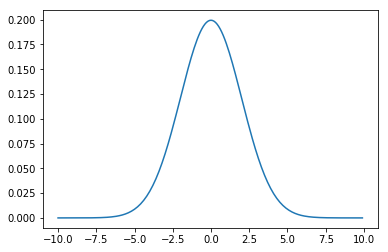

In [6]:
# Use this cell to plot the pdf associated with the gaussian distribution you have generated above

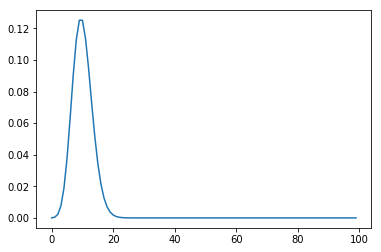

In [7]:
# Let's now do it for a probability mass function 

Other properties of the object (mean, std, moments, ...) can be calculated as we will see later. It is also possible to draw a random sample that follows the distribution we want to use using `scipy.stats.distribution.rvs()`:
``` python
# Generate a sample of 1000 points drawn from a gaussian distrib:
g_sample = g.rvs(1000)  

# Generate a sample of 10 points drawn from a poisson distrib:
pois_sample = pois.rvf(10) 
```

See Sect. 3.2 of our reference [book](#book) for an overview of the main distributions implemented in scipy. 

**Exercises:** 

- Generate a random sample of n points drawn from the gaussian distribution you defined above. (compare n=10, 100, 1000)
- Plot an histogram with the sample of points you have generated. 
- Plot a canonical gaussian pdf (width =1) and overplot an horizontal line showing its FWHM. 
- Print at the screen the value of the FWHM and compare the value you expect for a canonical 1D-gaussian (FWHM $= 2 * \sqrt{2 * \ln(2)} * \sigma $) 

TIP: Keep the expression of the FWHM of a Gaussian in mind, you may have to use it often. 

In [ ]:
# Use this cell to generate a random sample of points drawn from the gaussian distribution you defined above


In [ ]:
# ploting the histogram 


In [ ]:
# Illustration of a canonical gaussian pdf and overplot of a line showing its FWHM 


### I.4b pdf, conditional probability and Bayes rule for bivariate distributions:  <a class="anchor" id="bivariate"></a>

When we have 2 *continuous random variables*, we can write: 
    
$$
p(x,y) = p(x\,|\,y) \, p(y) = p(y\,|\,x) \, p(x)
$$

Such a distribution of 2 random variable is called a **bivariate distribution**. 

The *marginal probability* $p(x)$ (resp $p(y)$) is obtained by integrating $p(x, y)$ over all the probabilities to have obtained $y$ (resp $x$): 

$$
p(x) = \int p(x,y) \, {\rm d}y 
$$
$$
p(y) = \int p(x,y) \, {\rm d}x
$$

Hence, we have: 

$$
p(x)= \int p(x\,|\,y) \, p(y)  \, {\rm d}y
$$

$$
p(y\,|\,x) = \frac{p(x\, | \, y) \, p(y)}{p(x)} = \frac{p(x\, | \, y) \, p(y)}{\int p(x\,|\,y) \, p(y)  \, {\rm d}y}  
$$

For a non continuous variable (let's say ${y_j}$ with $j=1, ..., M$), the integral becomes a sum:

$$
p(y_j\,|\,x) = \frac{p(x\, | \, y_j) \, p(y_j)}{p(x)} = \frac{p(x\, | \, y_j) \, p(y_j)}{\sum_{j=1}^M \, p(x\,|\,y_j) \, p(y_j) }  
$$

For bi-(multi-)variate distributions, $p(x,y)$, one also defines the **covariance** (assume $<x>\,=\,<y>\,=\,0$):

$$
Cov(x,y) = <xy> = \int_{-\infty}^{+\infty}\int_{-\infty}^{+\infty} x y\,p(x,y) \, \rm{d}x\rm{d}y
$$

We can also define a dimensionless **correlation coefficient** (assuming zero mean): 

$$
r = \frac{<xy>}{\sqrt{<x^2><y^2>}} . 
$$

if $r = 1$ ($r = -1$) the two RV are (anti-)correlated, and independent if $r=0$. 
We will rediscuss the correlation and the covariance later. 

#### Example

Use of `scipy.stats.multivariate_normal()` for a multivariate **gaussian** distribution. See [below](#I.4c-Multivariate-normal-distribution) for more details. 

Text(0.5, 1.0, '$p(x | y =0.50 )$')

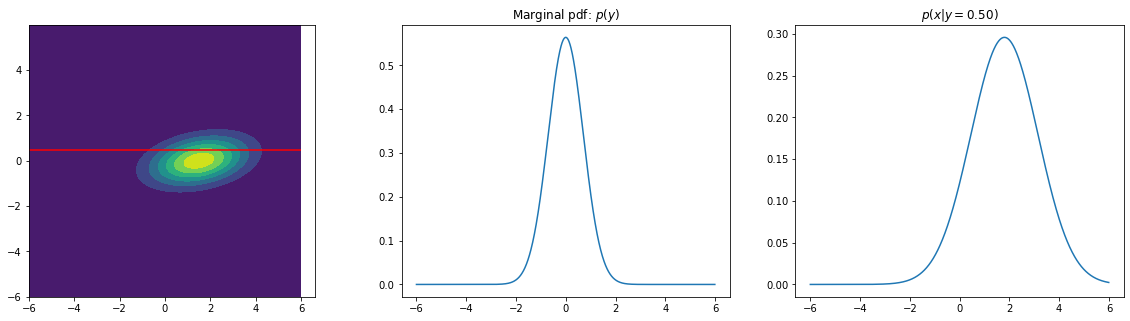

In [3]:
step = 0.01
x, y = np.arange(-6.,6.,step), np.arange(-6,6.,step)
X, Y = np.meshgrid(x,y)
# X, Y = np.mgrid[-6:6:.01, -6:6:.01]    # Alternative command to generate a meshgrid!
# I now create a 3D array containing the X and Y coordinates
pos = np.zeros(X.shape + (2,))   
pos[:, :, 0] = X
pos[:, :, 1] = Y

# Non isotropic bivariate normal distribution
# Warning: we give elements of the covariance matrix! 
n_2d = scipy.stats.multivariate_normal(mean=[1.5, 0.], cov=[[2.0, 0.3], [0.3, 0.5]])
f, ax = plt.subplots(figsize=(20,5), ncols=3)
ax[0].contourf(X, Y, n_2d.pdf(pos))
ax[0].set_aspect('equal')  # same unit length along x and y 

# Calculates the marginal pdf
ax[1].plot(y, n_2d.pdf(pos).sum(axis=1) * step )   # I sum over the x axis 
ax[1].set_title('Marginal pdf: $p(y)$')

# Plot p(y | x=xval) where xval = 1 
# define xid: index of xarray for which I want to know the conditional pdf p(y | x)
#xid = 800
#ax[0].vlines(x[xid]-step/2., -6, 6, color='red')
#ax[2].plot(y, n_2d.pdf(pos)[:, xid]   / (n_2d.pdf(pos).sum(axis=0)[xid] * step)) # Note the renormalisation by p(x) at x=xid
#ax[2].set_title('$p(y | x =%.2f )$'%x[xid])

# Plot p(x | y=yval) where yval = 0.5
yid = 650   # y = 0.5
ax[0].hlines(y[yid]-step/2., -6, 6, color='red')
ax[2].plot(x, n_2d.pdf(pos)[yid, :]   / (n_2d.pdf(pos).sum(axis=1)[yid] * step) ) # Note the renormalisation by p(y) at y=yid
ax[2].set_title('$p(x | y =%.2f )$'%y[yid])

Text(0.5, 1.0, '$p(x | y =0.50 )$')

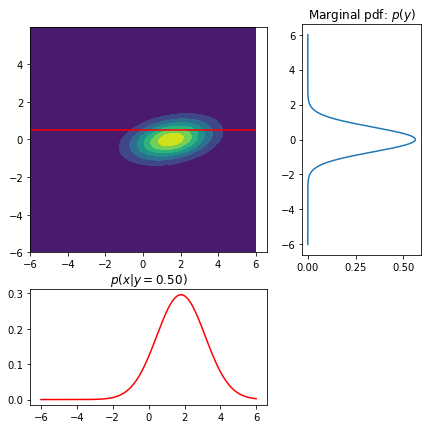

In [5]:
# A nicer visualisation 
fig = plt.figure(figsize=(7, 7))
ax = gridspec.GridSpec(
    2, 2, width_ratios=[2, 1], height_ratios=[2, 1])

ax0 = plt.subplot(ax[0])
col_ax0 = ax0.contourf(X, Y, n_2d.pdf(pos))
ax0.set_aspect('equal')  # same unit length along x and y 
ax0.hlines(y[yid]-step/2., -6, 6, color='red')

# plot the marginal pdf
ax1 = plt.subplot(ax[1])
ax1.plot(n_2d.pdf(pos).sum(axis=1) * step, y)   # I sum over the x axis  ; I inverse x and y for plotting
ax1.set_title('Marginal pdf: $p(y)$')

# Plot p(x | y=yval) where yval = 0.5
yid = 650   # y = 0.5
ax2 = plt.subplot(ax[2])
ax2.plot(x, n_2d.pdf(pos)[yid, :]   / (n_2d.pdf(pos).sum(axis=1)[yid] * step), color='red') # Note the renormalisation by p(y) at y=yid
ax2.set_title('$p(x | y =%.2f )$'%y[yid])

# Plot colorbar in axis3  - does not display too nicely
#ax3 = plt.subplot(ax[3])
#ax3.set_visible(False)  # clear the axis 
#cbar = fig.colorbar(col_ax0, )
#cbar.ax.set_ylabel('density: $p(x, xy)$', fontsize=13)

### I.4c Multivariate normal distribution 

In fact, one can generalise the bivariate normal distribution (or gaussian distribution: we use both names) to $n$ dimension. A multivariate normal distribution represents a distribution of a multivariate RV that is made up of multiple RV that can be correlated with each other. This multivariate normal distribution is best writen using matrix formalism. It is characterised by the mean vector $\mathbf{\mu}$, which is the expected value of the distribution; and the covariance matrix $\Sigma$, which measures how dependent random variables are and how they change together. 
 
The multivariate normal with dimensionality $d$ has a joint probability density given by:

$$
p(\mathbf{x} \mid \mathbf{\mu}, \Sigma) = \frac{1}{\sqrt{(2\pi)^d \lvert\Sigma\rvert}} \exp{ \left( -\frac{1}{2}(\mathbf{x} - \mathbf{\mu})^T \Sigma^{-1} (\mathbf{x} - \mathbf{\mu}) \right)}
$$
 
Where $\mathbf{z}$ a random vector of size $d$, $\mathbf{\mu}$ is the mean vector, $\Sigma$ is the symmetric and positive definite covariance matrix (of size $d \times d$), and $\lvert\Sigma\rvert$ its determinant. We denote this multivariate normal distribution as: 

$$
\mathcal{N}(\mathbf{\mu}, \Sigma)
$$

The the distribution is a multivariate gaussian, the marginal and conditional distributions are also gaussian. 

In the case of a 2D multivariate normal distribution, we have: 
$$
\begin{bmatrix}
\mathbf{x_1} \\
\mathbf{x_2} 
\end{bmatrix}
\sim
\mathcal{N}\left(
\begin{bmatrix}
\mu_{\mathbf{x_1}} \\
\mu_{\mathbf{x_2}}
\end{bmatrix},
\begin{bmatrix}
\Sigma_{11} & \Sigma_{12} \\
\Sigma_{12}^T & \Sigma_{22}
\end{bmatrix}
\right)
= \mathcal{N}(\mu, \Sigma)
, \qquad 
\Sigma^{-1} = \Lambda = 
\begin{bmatrix}
\tilde{\Sigma_{11}} & \tilde{\Sigma_{12}} \\
\tilde{\Sigma_{12}}^T & \tilde{\Sigma_{22}}
\end{bmatrix}
$$

The marginal distributions of each component $\mathbf{x}$ and $\mathbf{y}$ are defined as: 

$$
\begin{split}
p(\mathbf{x_1}) & = \mathcal{N}(\mu_{\mathbf{x_1}}, \Sigma_{11}) \\
p(\mathbf{x_2}) & = \mathcal{N}(\mu_{\mathbf{x_2}}, \Sigma_{22})
\end{split}
$$


In [6]:
# We can check this out using the same example as above, using linear algebra capabilities of numpy
d = 2  # dimensions
mean = np.matrix([[1.5], [0]])  # vector with (0, 0.5) as a column   
cov = np.matrix([ 
    [2.0, 0.3], 
    [0.3, 0.5]
])

# Get the mean values from the vector
mean_x1 = mean[0,0]
mean_x2 = mean[1,0]
# Get the blocks (single values in this case) from 
#  the covariance matrix
sigma_11 = cov[0, 0]
sigma_22 = cov[1, 1]
sigma_12 = cov[0, 1]  # = sigma_12 transposed in this case

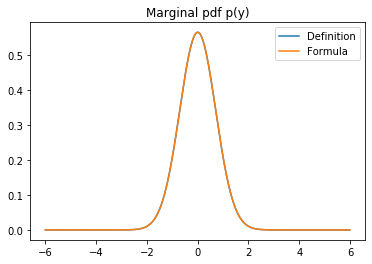

In [7]:
# marginal pdf p(y) -here y is equivalent to x2
# Numerical estimate 
plt.plot(y, n_2d.pdf(pos).sum(axis=1) * step, label='Definition')

# "theory" pdf 
# /!\ Beware: if using scipy.stats.norm(): the second argument is the std 
# For multivariate we have the cov matrix whose diagonal elements are the var = std**2 
#py_marginal_1d = scipy.stats.norm(mean_x2, np.sqrt(sigma_22))
# plt.plot(y, py_marginal_1d.pdf(y))

py_marginal = scipy.stats.multivariate_normal(mean_x2, sigma_22)
plt.plot(y, py_marginal.pdf(y), label='Formula')
plt.title("Marginal pdf p(y)")
plt.legend()


The **conditional distribution** of $\mathbf{x_1}$ given $\mathbf{x_2}$ is defined as: 

$$
p(\mathbf{x_1} \mid \mathbf{x_2}) = \mathcal{N}(\mu_{x_1|x_2}, \Sigma_{x_1|x_2})
$$

With mean:

$$
\mu_{x_1|x_2} = \mu_{x1} - \Sigma_{12} \Sigma_{22}^{-1} \left(x_2 -\mu_{x2}\right)
$$

and covariance matrix

$$
\Sigma_{x1|x2} = \Sigma_{11}-\Sigma_{12}\Sigma_{22}^{-1}\Sigma_{21}
$$


with $\Sigma_{11}-\Sigma_{12}\Sigma_{22}^{-1}\Sigma_{21}$ being the [Schur complement](https://en.wikipedia.org/wiki/Schur_complement) of $\Sigma_{22}$ (note that in that expression, we have also made use of $\Sigma^T_{12} = \Sigma_{21}$). 

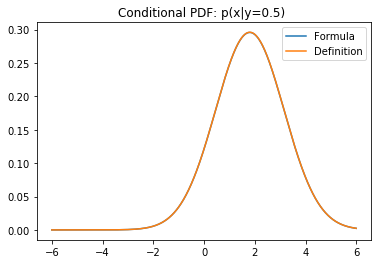

In [9]:
# Calculate p(x|y=0.5)
# Calculation through proper algebra
y_condition = 0.5  # To condition on y = 0.5
mean_xgiveny = mean_x1 + (sigma_12 * (1/sigma_22) * (y_condition - mean_x2))
cov_xgiveny = sigma_11 - sigma_12 * (1/sigma_22) * sigma_12

# Numerical estimate
px_giveny = scipy.stats.multivariate_normal(mean_xgiveny , cov_xgiveny)
plt.plot(x, px_giveny.pdf(x), label='Formula')  # y=0.5

plt.plot(x, n_2d.pdf(pos)[yid, :] / (n_2d.pdf(pos).sum(axis=1)[yid] * step ), label='Definition') # Note the renormalisation by p(y) at y=yid
plt.title("Conditional PDF: p(x|y=0.5) ")
plt.legend()

#### Supplementary exercise: 

- Check that the conditional and marginal distribution are effectively pdf, namely that their integral equals 1. 
- Calculate p(y | x=1.0) 

### I.5 What is a cumulative distribution function ? 


The *integral of a pdf* is called **cumulative distribution function**. 
$$
p(X \leq x) = H(x) = \int_{-\infty}^{x}\, h(x') \, {\rm d}x'
$$

Obviously/by definition, we have that the integral of H(x) (i.e. between $-\infty$ and $+\infty$) is equal to 1.   

Let's visualise the CDF $H(x_0) = p(X \leq x_0)$, in the case of a gaussian PDF. We see that this is the area below the PDF between $-\infty$ and $x_0$.    

Text(-1.6, 0.1, '$H(x_0) = p(X \\leq x_0)$')

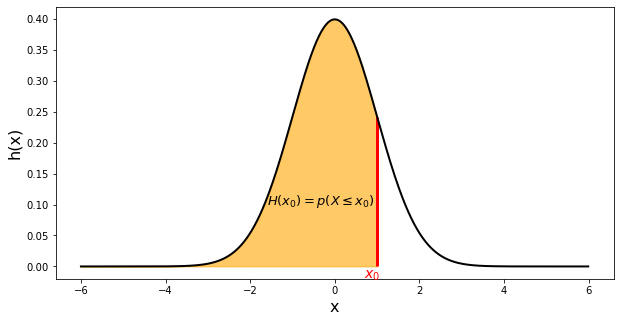

In [10]:
x = np.arange(-6,6,0.01)
x0 = 1.   # let's take x0 = 1 
id_x0 = np.searchsorted(x, x0)
g = scipy.stats.norm(loc=0, scale=1)
f, ax = plt.subplots(ncols=1, figsize=(10, 5))
ax.plot(x, g.pdf(x), color='black', lw=2)
ax.vlines(x0, 0, g.pdf(x0), color='red', lw=3)
ax.fill_between(x[:id_x0], 0, g.pdf(x[:id_x0]), color='orange', alpha=0.6)
ax.set_ylabel('h(x)', size=16)
ax.set_xlabel('x', size=16)
ax.text(0.7, -0.02, r'$x_0$', size=14, color='red')
ax.text(-1.6, 0.1, r'$H(x_0) = p(X \leq x_0)$', size=13)

The CDF provides a direct way to calculate the probability for the value of a random variable $X$ to be between 2 values $x_1$ and $x_2$. If $x_1 < x_2$, then $P(x_1 < X < x_2) = H(x_2) - H(x_1)$. On the above figure, this would be the difference of area up to $x_2$ minus the area up to $x_1$.   

Hence, you know how to derive the *p% quantile* of a distribution. $q_p$ defined as:

$$
\frac{p}{100} = \int_{-\infty}^{q_p} h(x) dx
$$

$q_{25}$, $q_{50}$ and $q_{75}$ are commonly called the first, second and third *quartile* or 25 / 50 / 75 *percentile* of the distribution. $q_{75} - q_{25}$ is called *interquartile range* and provides a robust estimate of the width of a distribution. By definition, the *interquartile range* contains 50% of the surface behind the CDF / PDF and hence 0.5 of the probability (centered on the median). We will see later how to use percentiles to calculate confidence intervals. 

Note that *lowercase* letters are used for probability density (differential distribution) functions (pdf), and upper case for their cumulative counterpart (CDF).

**Example**:

An important CDF is the one of the gaussian distribution:

$$
H(x\,|\,\mu, \sigma) = \frac{1}{\sqrt{2\pi}\,\sigma} ~ \int_{-\infty}^{x} \exp \left( -\frac{1}{2}\frac{(x'-\mu)^2}{\sigma^2}\right) {\rm d}x'. 
$$

This function is generally evaluated in terms of what is called the *Gauss error function* :   
$$
\rm{erf}(z) = \frac{2}{\sqrt{\pi}}~\int_0^z \exp(-t^2)\,{\rm{d}}t.
$$

This function can be evaluated using `scipy.special.erf()`. 

Using the error function, the CDF of a Gaussian distribution can be re-written:

$$
H(x\,|\,\mu, \sigma) = \frac{1}{2}~\left( 1 \pm \rm{erf} \left( \frac{|x-\mu|}{\sqrt{2}\sigma} \right)  \right),
$$

with "+" sign if $x > \mu$, and "-" sign if $x<\mu$. 

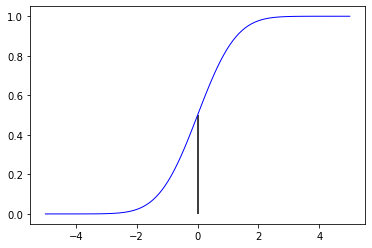

In [11]:
# CDF of a gaussian
f, ax = plt.subplots(nrows=1)
n = scipy.stats.norm(0, 1)
x=np.linspace(-5,5, 100)
g_cdf = n.cdf(x)
ax.plot(x, g_cdf, lw=1, color="blue")
ax.vlines(0, 0,0.5)

*How to read up the percentile / probability from the CDF in python ?*

If you want to know for which value of $x$ we have a given probability/percentile, you may use the "percent point function" or `ppf` (i.e. the inverse of the `cdf`). To know for which $x$ one gets a specific $q$ ($0 < q < 1$), you may use the command: `scipy.stats.distrib.ppf(q)`  (replace `distrib` by the name of the distribution you are interested in). 

In [ ]:
# Example: For canonical gaussian, find x0 corresponding to q_20 (i.e. p(X<x0) = 0.2) 


### I.6 Working with pdf and CDF 

In scipy.stats, there are classes for many distributions, which have methods that can very useful to study pdf! 

#### I.6.1 Generate random samples / Monte-Carlo methods: 

It is common in science that you will have to *simulate* data, either to test an algorithm that you have written (e.g. to automatically identify a specific type of objects in an image, to test the ability of your code to detect a weak signal when the signal to noise is small, ...), or to study data errors.        

Let's first see how to generate samples in such a way that their distribution follow a known distribution (check [Descriptive_statistics_02.ipynb](../03-Basic_statistics_and_proba_concepts/Descriptive_statistics_02.ipynb) for an overview of common PDF encountered in science). The distributions in `scipy.stats` (e.g. `scipy.stats.norm` or `scipy.stats.uniform`) each have a method called `rvs` which implements a pseudo random sample from the distribution. This is extremely useful if you want to generate synthetic data (also called "mock data") that follow a specific distribution. This can e.g. be used to generate noise following a specific distribution to be added onto a synthetic data set. 

Here is an example generating a mock sample drawn from a uniform distribution:

$$
p(x \, | \, \mu, W) = \frac{1}{W} ~ \mathrm{for}~|x-\mu| \leq \frac{W}{2}, ~\mathrm{and~0~otherwise}
$$

In [ ]:
uni = scipy.stats.uniform(10, 5)   # First argument, i.e. 10, is the left edge, second is width
uni_sample = uni.rvs(1000)
qq = plt.hist(uni_sample, bins=20, color='blue', alpha=0.2, density=True)
plt.xlabel('x')
plt.ylabel(r'$p(x) \rm{d}x$')

**Question** Do you understand the values on $y$ scale ? 

In [ ]:
# Try to generate a random sample drawn from a bivariate Gaussian distribution (cf I.4b)

#### I.6.2 Fit for parameters of specific distributions:

The fit of the parameters of a distribution only works for for continuous distributions (i.e. it does not work for discrete distributions). 

In [ ]:
# Let's create an instance of a normal distribution with (mu, sigma) = (2, 4) 
n = scipy.stats.norm(2, 4)   # THis create an instance of a normal distribution with (mu, sigma) = (2, 4)

In [ ]:
## let's generate a random sample drawn from that distribution and fit a notmal distribution on it

# Let's create a fake sample of 1000 data points drawn from a notmal distribution 
# instead you could read a data file with the sample you want to analyse 
#sample = np.random.normal( 2, 4, 1000)   
sample = n.rvs(1000)
# Let's visualise the histogram with our data sample 
mydata_hist = plt.hist(sample, bins=20, color='blue', alpha=0.2, density=True)

In [ ]:
# Now, we FIT a normal PDF on the distribution of data points   
fitpdf_mean, fitpdf_sigma = scipy.stats.norm.fit(sample)   

# Let's plot (again) the histogram of the data 
mydata_hist = plt.hist(sample, bins=20, color='blue', alpha=0.2, density=True)
# Let's now plot the data histogram and overplot in red the gaussian PDF we fitted above
x = np.linspace(-20, 20, 200)  # Grid over which I want to evaluate the fitted PDF
norm_fit = scipy.stats.norm(fitpdf_mean, fitpdf_sigma)   # Let's generate an instance of the fitted gaussian distribution
plt.plot(x, norm_fit.pdf(x), color='red')  # norm_fit.pdf(x): evaluate the pdf of the fitted pdf at x

# Let's visualise the fitted parameters of the fitted PDF
print("The fit parameter for the mean of the distribution is: %.4f"%fitpdf_mean)
print("The fit parameter for the standard deviation of the distribution is: %.4f"%fitpdf_sigma)

#### I.6.3 Calculate statistical quantities associated to a distribution 

You can also calculate various statistics associated to your function such as the mean, median, standard deviation, central moments, ... (see [Descriptive_statistics_01.ipynb](../03-Basic_statistics_and_proba_concepts/Descriptive_statistics_01.ipynb) for a recap of the definition of those quantities)

In [ ]:
# Let's take a canonical normal distribution with (mu, sigma) = (0,1)
n = scipy.stats.norm(0, 1)
print('Mean = %.2f  ' %n.mean() )
print('Median = %.2f  ' %n.median() )
print('Stdev = %.2f  ' %n.std() )
print('Central moment of order 4 = %.2f' %n.moment(4) )

You can also calculate the $p$ percentile of a function or "percent point function" or ppf (i.e. the inverse of the cdf): `scipy.stats.distrib.ppf(q)` 

In [ ]:
print('q_25 and q_75 are %.3f , %.3f' %(n.ppf(0.25), n.ppf(0.75)) )
print('The interquartile range is %.3f' % (n.ppf(0.75)- n.ppf(0.25)) )

Let's visualise what is this inter-quartile range. *Look at the code and figure* to ensure that you understand the relation between `ppf`, `cdf` and `pdf`.

In [ ]:
f, ax = plt.subplots(nrows=2, figsize=(5,8))
x = np.arange(-6,6,0.1)
ax[0].set_title('CDF')
ax[0].plot(x, n.cdf(x))

# The ppf is inverse of CDF => reads the function from y axis
# Draws 2 arrows from y=0.25 and y=0.75.  
# Definition of ax.arrow(): ax.arrow(x, y, dx, dy) 
ax[0].arrow(-6, 0.25, n.ppf(0.25)+6, 0., width=0.01, length_includes_head=True, head_length=0.4)
ax[0].arrow(-6, 0.75, n.ppf(0.75)+6, 0., width=0.01, length_includes_head=True, head_length=0.4)
ax[0].text(-6, 0.27, '0.25')
ax[0].text(-6, 0.77, '0.75')

# The ppf returns the x for which cdf(x = q_{25}) = 0.25 and  cdf(x = q_{75}) = 0.75 
q25, q75 = n.ppf(0.25), n.ppf(0.75)
id25, id75 = np.searchsorted(x, q25), np.searchsorted(x, q75)  
ax[0].arrow(n.ppf(0.25), 0.25, 0, -0.25, width=0.01, length_includes_head=True, head_width=0.3, head_length=0.03)
ax[0].arrow(n.ppf(0.75), 0.75, 0, -0.75, width=0.01, length_includes_head=True, head_width=0.3, head_length=0.03)
ax[0].text(0.54, -0.04, '$q_{75}$', color='red' )
ax[0].text(-0.94, -0.04, '$q_{25}$', color='red' )
ax[0].fill_between(x[id25:id75], n.cdf(x[id25:id75]), 0, color='orange', alpha=0.6)

ax[0].set_ylabel('$p(<x)$')

ax[1].plot(x, n.pdf(x))
ax[1].set_title('PDF')
ax[1].set_xlabel('x')

# Let's plot 2 vertical line and color the area corresponding to the interquartile 
ax[1].vlines(q25, 0, n.pdf(q25))
ax[1].vlines(q75, 0, n.pdf(q75))
ax[1].fill_between(x[id25:id75], n.pdf(x[id25:id75]), 0, color='orange', alpha=0.6)

qq = [ax[i].set_xlim(-6,6) for i in range(2)]
ax[0].set_ylim(0,1)
ax[1].set_ylim(0,0.5)

The region delimited by the 2 vertical black lines on the bottom pannel corresponds to the interquartile range. The orange area covered in the pdf is 50% of the surface covered by the PDF, which means that 50% of the total probability is in that range. The $q_{25}, q_{50}, q_{75}$ quartiles divide the sample into 4 equally probable samples. There is 25% probability for a value $X$ to be $X < q_{25}$, or 25% probability for a value $X$ to be $X > q_{75}$. 

#### Supplementary exercise

Noting, from the definition of the CDF, that:    

$$
p(a < x < b\,| \,\mu, \sigma) = P(b \, | \,\mu, \sigma)-P(a \,| \, \mu, \sigma)
$$

Verify that, for a Gaussian distribution, we have the following probabilities:
- $p(\mu - 1\,\sigma < x < \mu + 1 \, \sigma) = 0.6827$
- $p(\mu - 2\,\sigma < x < \mu + 2 \, \sigma) = 0.9545$
- $p(\mu - 3\,\sigma < x < \mu + 3 \, \sigma) = 0.9973$

Make your calculation with `scipy.ppf` or using the `scipy.erf`. 

## Intermezo: Descriptive statistics

This section is *not* mandatory if you fulfill the prerequisite for this course. However, if you do not feel confortable with the concepts we have reviewed above, consider runing the following notebooks:     

- To review the **properties of probability distribution functions** (mean, standard deviation, variance, skewness, ...), go to the notebook [Descriptive_statistics_01.ipynb](Descriptive_statistics_01.ipynb).    

- To **better understand visually the link between PDF and CDF**, and do an interactive tour of the characteristics and properties of **common distributions** encountered in science, then, run the Notebook [Descriptive_statistics_02.ipynb](Descriptive_statistics_02.ipynb). 

## Summary 

We have reviewed basic statistical concepts and quantities, and how to use them in python. In particular: 
- basic probability concepts: a sample, an event, a realisation, a conditional probability (i.e. $p(A|B)$ is probability of $A$ given $B$). 
- the probability combination rules. 
- what is a **random variable** (this is a key concept!), and how to generate and manipulate random variable with numpy: `np.random.rand()`, `np.random.seed(value)`, `np.random.RandomState(value)`, `np.random.randint()`, `np.random.permutation()`
- Probability density function (pdf) and Cumulative density function (CDF) (You *need* to understand what are these functions very well !)
- How to manipulate distributions with `scipy.stats`. For example, to work with a gaussian, and subsequently calculate pdf, cdf, ... drawn from a gaussian distribution, : `g = scipy.stats.norm()` followed by `g.pdf(x)` to get a pdf sampled for values x (single value or array), `g.cdf(x)` for the cdf(), ...
- Bivariate PDF, marginal distribution and multivariate distributions
- The expression of a multivariate normal distribution: beware of the defintion of the univariate and multivariate normal distrib. in scipy: use of the std in `scipy.stats.norm(mu, sig)` but of the covariance in `scipy.stats.multivariate_normal(mu, cov)`
- How to calculate an interquartile range based on the cdf of a function, using the inverse of a cdf, the ppf of percent point function (`scipy.stats.mydistribution.ppf()`). 

## X. References and supplementary material: <a class="anchor" id="X"></a>

* **Chapter 1** (1.2), **Chapter 3** (3.1, 3.2) and **Chapter 4** (4.1 to 4.3) of the book <a class="anchor" id="book"></a> *Statistics, data mining and Machine learning in astronomy* by Z. Ivezic et al. in Princeton Series in Modern Astronomy. 

* Youtube video about Random variable and PDF: https://www.youtube.com/watch?v=9KVR1hJ8SxI : First 7 minutes
* Youtube video about CDF and its link to PDF: https://www.youtube.com/watch?v=4BswLMKgXzU : First 6 minutes

* *All of statistics: a concise course in statistical inference*, Wasserman 2004  <a class="anchor" id="WAS04"></a>(see also errata in http://www.stat.cmu.edu/~larry/all-of-statistics/) and personal notes from "Telmo Correa" here https://github.com/telmo-correa/all-of-statistics/tree/master.  

* *Statistics in theory and Practice*, Lupton 1993 <a class="anchor" id="LUP93"></a>: **Chapter 2**

* [Numerical recipes](http://www2.units.it/ipl/students_area/imm2/files/Numerical_Recipes.pdf) by Press et al. Cambridge University press: **Chapter 15**, **Chapter 18.7** 

